<a href="https://colab.research.google.com/github/gomachinelearning/Blogs/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
data['rooms_per_household'] =  data['total_rooms'] / data['households']
data['bedrooms_per_household'] =  data['total_bedrooms'] / data['households']


In [4]:
corr = data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.691871
rooms_per_household       0.150081
total_rooms               0.130991
housing_median_age        0.106758
households                0.061031
total_bedrooms            0.045783
population               -0.027850
longitude                -0.044982
bedrooms_per_household   -0.045668
latitude                 -0.144917
Name: median_house_value, dtype: float64

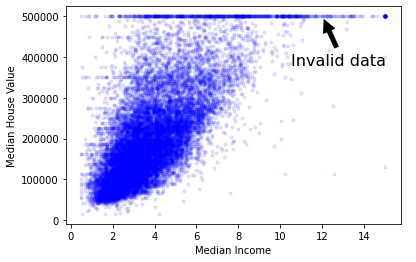

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = data['median_income']
y =  data['median_house_value']
def plot_data():
  plt.axis([0,14,0,550])
  plt.plot(X,y, 'b.', alpha=0.1)
  plt.xlabel('Median Income')
  plt.ylabel('Median House Value ($1000)',rotation=90)
  plt.title

plt.plot(X,y, 'b.', alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value',rotation=90)
plt.annotate(s='Invalid data',xy=(12, 500000),
             xytext=(0.70, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

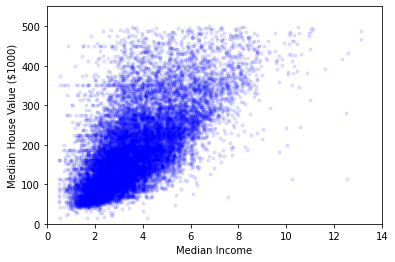

In [6]:
X= X[y<500000]
y= np.array(y[y<500000])/1000 # divide by 1000. Helps simplify handling the the maths and graphs going forward
y=y.reshape(-1,1)
plot_data()
plt.show()

<Figure size 432x288 with 0 Axes>

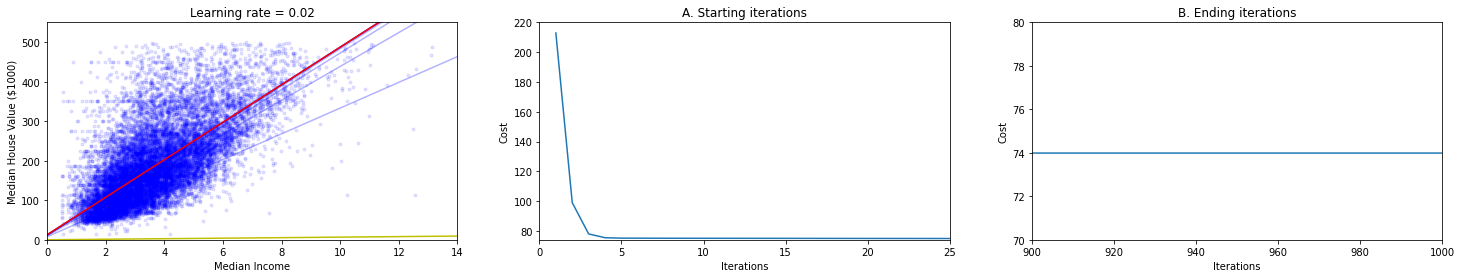

In [7]:
#cost metric
from sklearn.metrics import mean_squared_error

# the size of the sample data. 
m = len(X)

# add x0 = 1 to each instance.
X_new = np.c_[np.ones((m, 1)), X]  

# Used to illustrate the first 10 iterations
# Lines will be drawn in the graph reprenting the predictions of the model for the
# first 10 iterations using the thetas (weights) adjusted with the gradients.
X_for_first  =np.array([[0], [14]])
X_for_first_iterations = np.c_[np.ones((2, 1)), X_for_first] 


# plot the cost vs the number of iterations
def plot_costs(x1,x2,y1,y2, iterations ,cost,  isStart):
  plt.axis([x1,x2,y1,y2])
  plt.plot(np.arange(1,iterations+1),cost)
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  if isStart == 1:
    title = 'A. Starting iterations'
  else:
    title = 'B. Ending iterations'
  plt.title(title)

#plot the gradient descent
#theta = initial assumption of thetas (or weights) , t0 and t1
#iterations = the number of iterations to fine tune the theatas and lower the cost
#lr = the learning rate. the control how big is the step to take between iterations
def plot_gradient_descent(thetas, iterations, lr):
  
  #placeholder of costs 
  costs=[]
  X_new_transposed = X_new.T
  for iteration in range(iterations):
    if iteration < 10:

      #calculate the predicted house value 
      y_predict = X_for_first_iterations.dot(thetas) 

      #plot the prediction
      if iteration == 0:        
        plt.plot(X_for_first, y_predict, 'y-', alpha=1)
      elif iteration == 9:
        plt.plot(X_for_first, y_predict, 'r-', alpha=1)
      else:
        plt.plot(X_for_first, y_predict, 'b-', alpha=0.3)

  

    #predicted values accross all data sample
    y_pred = X_new.dot(thetas)

    #gradient accross all data sample
    gradient = (2/m) * X_new_transposed.dot((y_pred - y))

    #adjust the theta values
    thetas = thetas - lr * gradient

    costs.append(np.sqrt(mean_squared_error(y, y_pred)))

  plt.title("Learning rate = {}".format( lr))
  return costs,thetas

plt.clf()
plt.figure(figsize=(25,4))

#initialize thetas with random values
thetas= np.random.rand(2,1) 

#number of iterations to fine tune the theatas and lower the cost
iterations = 1000 

#illustrate the gradient descent
plt.subplot(1,3,1)
plot_data()
learning_rate= 0.02
costs, end_thetas = plot_gradient_descent(thetas, iterations, learning_rate )

#plot the cost vs number of iterations for the first 25 iterations
plt.subplot(1,3,2)
plot_costs(0,25,74,220,iterations,costs,1)


#plot the cost vs number of iterations for the last 100 iterations
plt.subplot(1,3,3)
plot_costs(900,1000,70,80,iterations,costs,0)

plt.show()

In [8]:
end_thetas

array([[44.05762186],
       [40.18773149]])

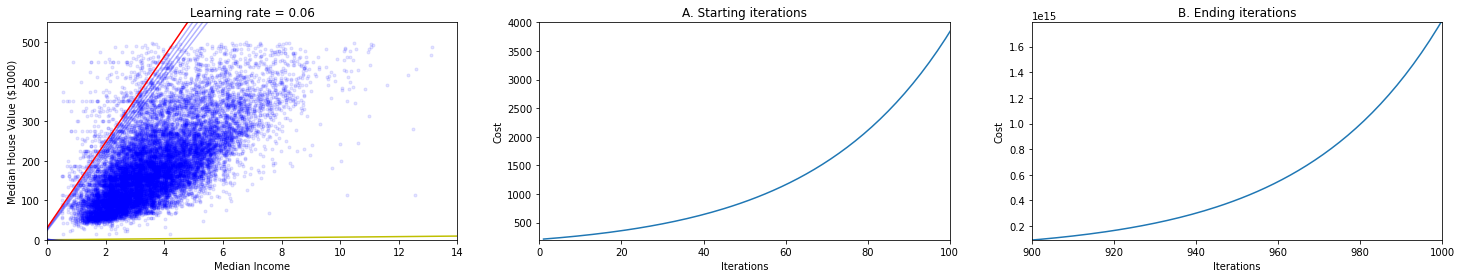

In [9]:
plt.figure(figsize=(25,4))

plt.subplot(1,3,1)
plot_data()

learning_rate=0.06
costs, end_thetas = plot_gradient_descent(thetas, iterations,learning_rate)

#plot the cost vs number of iterations for the first 100 iterations
plt.subplot(1,3,2)
plot_costs(0,100,200,4000,iterations,costs,1)

#plot the cost vs number of iterations for the last 100 iterations
plt.subplot(1,3,3)
plot_costs(900,1000,93053145367247.0 ,1789583094182956.0,iterations,costs,0)

plt.show()

In [10]:
end_thetas

array([[-1.01886059e+14],
       [-4.40151118e+14]])

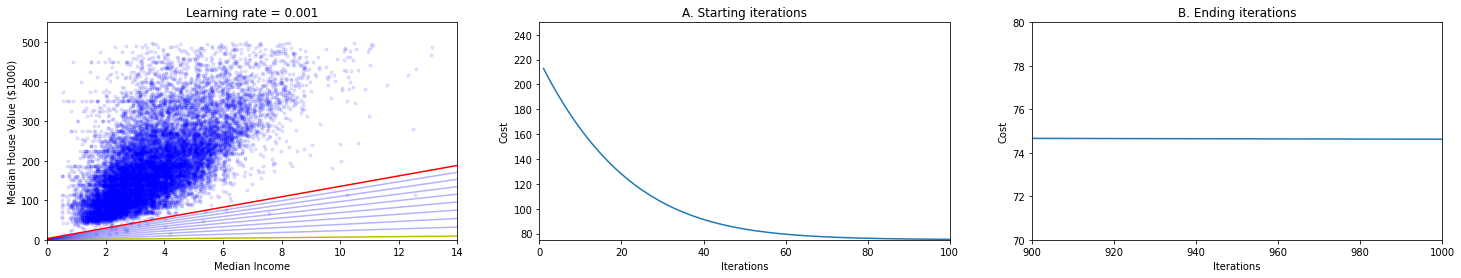

In [11]:
plt.figure(figsize=(25,4))

plt.subplot(1,3,1)
plot_data()

learning_rate= 0.001
costs, end_thetas = plot_gradient_descent(thetas,iterations, learning_rate)

#plot the cost vs number of iterations for the first 100 iterations
plt.subplot(1,3,2)
plot_costs(0,100,75,250,iterations,costs,1)

#plot the cost vs number of iterations for the last 100 iterations
plt.subplot(1,3,3)
plot_costs(900,1000,70 ,80,iterations,costs,0)

plt.show()


In [12]:
end_thetas

array([[19.44558384],
       [45.88491922]])

In [0]:

epochs = 20
learning_rate = 0.02
theta = np.random.randn(2,1)
cost_epoch= [] 
thetas=[]
for epoch in range(epochs):
  cost_iter= 0
  for i in range(m):        
    random_index = np.random.randint(m)
    y_i = y[random_index:random_index+1]
    x_i = X_new[random_index: random_index + 1]
    y_i_pred = x_i.dot(theta)
    gradient = 2 * x_i.T.dot(y_i_pred  - y_i)   
    theta = theta - learning_rate * gradient
    thetas.append(theta)
    cost_iter += np.sqrt(mean_squared_error( y_i, y_i_pred))
  cost_epoch.append(cost_iter / m)
  theta

Text(0.5, 1.0, 'B. Stochastic Gradient Descent')

<Figure size 432x288 with 0 Axes>

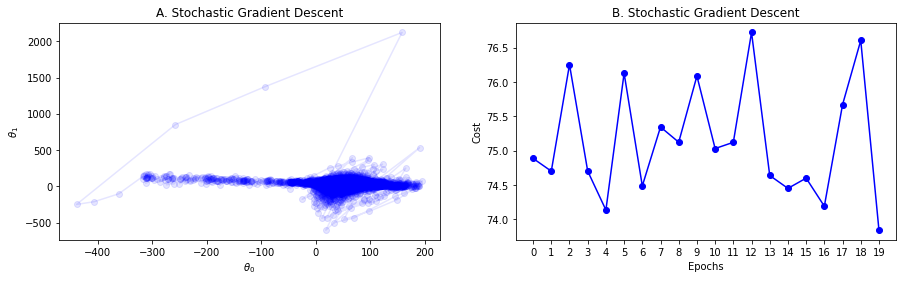

In [14]:
plt.clf()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
thetas = np.array(thetas)
plt.plot(thetas[:,0],thetas[:,1],'bo-' ,alpha=0.1 )

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title('A. Stochastic Gradient Descent')

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),cost_epoch,'bo-' )
tickpos = np.arange(epochs)
plt.xticks(tickpos,tickpos)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('B. Stochastic Gradient Descent')

In [0]:
batch_size =500
epochs = 500
learning_rate = 0.02
theta=np.random.randn(2,1)
thetas=[]
cost_epoch=[]
for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)
  X_shuffled=X_new[shuffled_indices]
  y_shuffled=y[shuffled_indices]
  cost_batch=0
  for batch in range(0,m,batch_size):
    X_batch = X_shuffled[batch:batch+batch_size]
    y_batch = y_shuffled[batch:batch+batch_size]
    y_batch_pred = X_batch.dot(theta)
    gradient = (2/batch_size) * X_batch.T.dot(y_batch_pred - y_batch)    
    theta= theta-learning_rate*gradient   
    thetas.append(theta)
    cost_batch += np.sqrt(mean_squared_error(y_batch, y_batch_pred))    
  cost_epoch.append(cost_batch / batch_size)


Text(0.5, 1.0, 'B. Mini Batch Gradient Descent')

<Figure size 432x288 with 0 Axes>

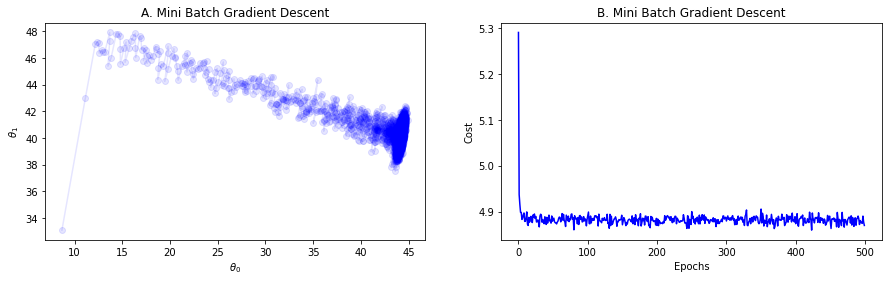

In [16]:
plt.clf()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
thetas = np.array(thetas)
plt.plot(thetas[:,0],thetas[:,1],'bo-',alpha=0.1 )

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title('A. Mini Batch Gradient Descent')

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),cost_epoch,'b-' )
plt.xlabel('Epochs')
plt.ylabel('Cost')
#plt.axis([800,999,4,5])
plt.title('B. Mini Batch Gradient Descent')

In [0]:
iterations= 5000
cost=[]
theta=np.random.randn(2,1)
thetas=[]
learning_rate=0.02
for iteration in range(iterations):  
  y_pred = X_new.dot(theta)
  gradient = (2/m) * X_new.T.dot((y_pred - y))
  theta = theta - learning_rate * gradient  
  thetas.append(theta)
  cost.append(np.sqrt(mean_squared_error(y, y_pred)))

Text(0.5, 1.0, 'B. Batch Gradient Descent')

<Figure size 432x288 with 0 Axes>

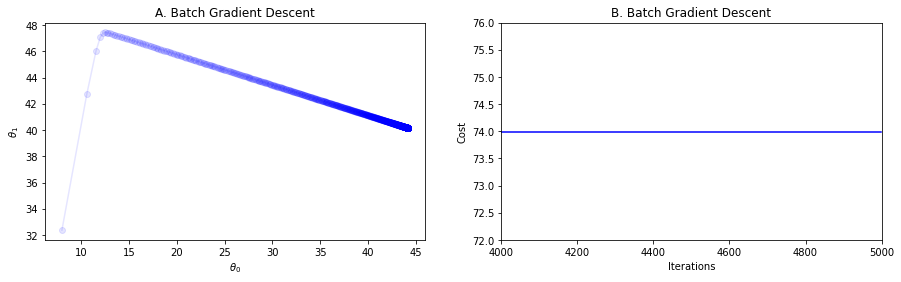

In [18]:
plt.clf()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
thetas = np.array(thetas)
plt.plot(thetas[:,0],thetas[:,1],'bo-' ,alpha=0.1)

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title('A. Batch Gradient Descent')

plt.subplot(1,2,2)
plt.plot(np.arange(iterations),cost,'b-' )
plt.axis([4000,5000,72,76])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('B. Batch Gradient Descent')